# Home Work

The goal of the assignment is to perform an intensive visual analysis of a real-life dataset and to find a good feature representation for the data.

The original problem statement was to build an algorithm to classify time series into one of two classes. The data sets contain approximately 5000 of time series (the size of the training subsample is 1320). Each series consists of values for 500 time points and belongs to class {-1} or {1} (see column Target). 

## Preparetions

Let us import  depencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


Load train data from *.csv file

In [2]:
data_test = pd.read_csv('https://raw.githubusercontent.com/rost5000/example-data/master/hw1_test.csv')
data_train = pd.read_csv('https://raw.githubusercontent.com/rost5000/example-data/master/hw1_train.csv')


In [3]:
print(sum(data_train["Target"] == 1))
print(sum(data_train["Target"] == -1))

639
681


What did we recieved?

In [4]:
data_test.head()


,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
1,1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
2,-1,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
3,-1,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
4,-1,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


Let us divide data

In [3]:
X_test = data_test.drop(["Target"], axis=1)
Y_test = data_test["Target"]
class1_test = data_test[data_test['Target'] == 1]
class1_test = class1_test.drop(["Target"], axis=1)
class2_test = data_test[data_test['Target'] == -1]
class2_test = class2_test.drop(["Target"], axis=1)

X_train = data_train.drop(["Target"], axis=1)
Y_train= data_train["Target"]

class1_train = data_train[data_train['Target'] == 1]
class1_train = class1_train.drop(['Target'], axis=1)
class2_train = data_train[data_train['Target'] == -1]
class2_train = class2_train.drop(['Target'], axis=1)

In [6]:
X_test.head()

,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,Time-9,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,1.6408,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,-1.6200,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
2,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,-2.5506,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
3,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,-1.5069,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
4,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,1.4665,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


# Data analisis

There are a lot of indexes. The idea is to estimate correlation in order to drop some unuseful columns.

Let estimate correlation between values

In [0]:
i = 0
result_corr = [];
result_index = [];

for indx1 in range(500):
  for indx2 in range(indx1, 500):
    if (indx1 == indx2):
      continue
    arr1 = X_train.iloc[:,indx1]
    arr2 = X_train.iloc[:,indx2]
    
    
    corr = np.correlate(arr1, arr2);


    result_corr.append(corr)
    result_index.append([indx1, indx2])


In [8]:
print(result_corr[:5])
print(result_index[:5])

[array([1332.38330345]), array([1145.84533049]), array([871.97252681]), array([549.9718897]), array([217.6789382])]
[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5]]


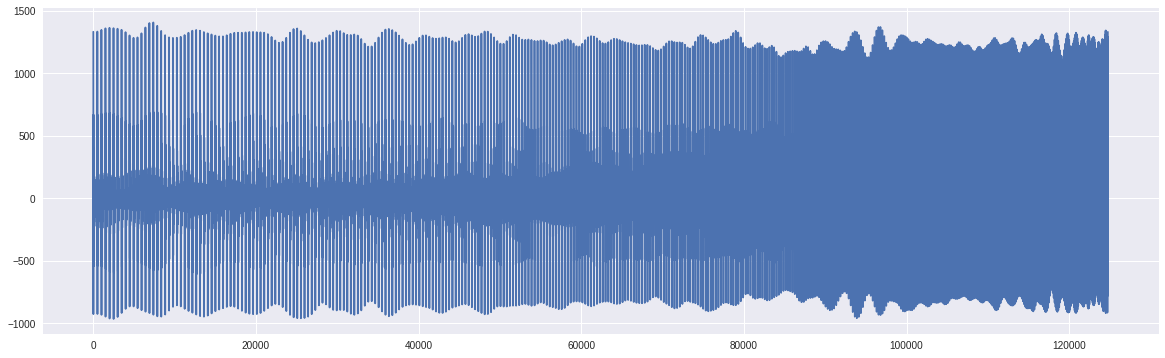

In [9]:
plt.figure(figsize=(20,6))
plt.plot(result_corr, '-')


There is a lot of range of correlation. If 2 values have a big correlation, so we can drop one of them, because they have the same behavior. If 2 values have a big negative value, one of them values can be missed too.

Let us define border





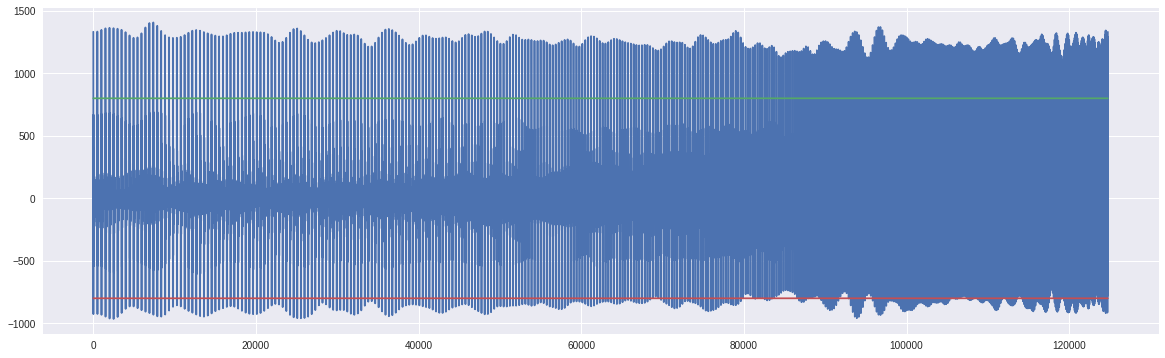

In [10]:
border_up = 800
border_down = -800

plt.figure(figsize=(20,6))
plt.plot(result_corr, '-')
plt.plot(np.ones(result_corr.__len__()) * border_up, '-')
plt.plot(np.ones(result_corr.__len__()) * border_down, '-')

Let us drop indexes

In [0]:
n = result_corr.__len__();
i = 0
X_new_test = X_test.as_matrix()
indx_deleted = []
while(i < n):
  if ((result_corr[i] < border_down) or (result_corr[i] > border_up)):
    indx = result_index[i][0]
    indx_deleted.append(indx)
    while(result_index[i][0] == indx ):
      i = i + 1
      if (i >= n):
        break
  else:
    i = i + 1
    
X_new_test = np.delete(X_new_test, indx_deleted, axis=1)
X_new_train = np.delete(X_train.as_matrix(), indx_deleted, axis=1)

What at the end?

In [12]:
print(X_new_train.shape)
print(X_train.shape)

(1320, 1)
(1320, 500)


To my mind, we obtain a very strange result. However, probably, the information about Y contains in the one row. Let use a default classificator to estimate our competition. The default classificator can find depencies faster than me, and, at the end, we will  try to obtain a simple classificator. 

Let estimate data accurancy using default library. Maybe, our converting can help us to achieve good results because we delete some noise.

In [6]:
def evaluate_model(model, x_train, y_train, x_test, y_test):

    print("Accuracy on train", 
          np.mean(model.predict(x_train.as_matrix()) == y_train.as_matrix()))

    print("Accuracy on test",
          np.mean(model.predict(x_test.as_matrix()) == y_test.as_matrix()))

In [14]:
baseline_model =  KNeighborsClassifier()

baseline_model.fit(X_train.as_matrix(), Y_train.as_matrix())

evaluate_model(baseline_model, X_train, Y_train, X_test, Y_test)

('Accuracy on train', 0.8022727272727272)
('Accuracy on test', 0.68619827825604)


In [15]:
baseline_model.fit(X_new_train, Y_train.as_matrix())

evaluate_model(baseline_model, pd.DataFrame(data=X_new_train), Y_train, pd.DataFrame(X_new_test), Y_test)

('Accuracy on train', 0.6818181818181818)
('Accuracy on test', 0.5059705637322965)


This results seem that the data of train is generated randomly. Let see the data distribution of 2 classes in the new array. 

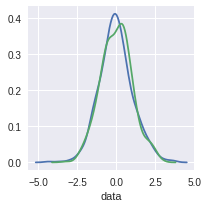

In [16]:


fg = sns.FacetGrid(pd.DataFrame({"data": X_new_train[:,0], "Y":Y_train.as_matrix()}), hue="Y")
fg.map(sns.kdeplot, "data")

It is clear that, information in the files do not have any non-random algorithm to divide into 2 different classes. *The recomended agorithm is throwing a coin to make decision. *

To proove our law, let use random variable to choose a random column and see distributions of 2 classes. As we can see, any plot does not show offset. all datas have Gaussian distribution law with identety parameters.  

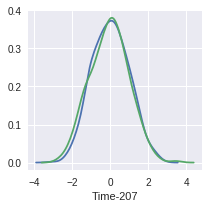

In [17]:
fg = sns.FacetGrid(data_train, hue="Target")
fg.map(sns.kdeplot, "Time-{}".format(int(500*rnd.random())))

Let use algorithm of coin to prove our result. In some situation our method of classification shows better results than logistic regression

In [18]:

class SimpleClassificator:
  def predict(self, X):
      return np.random.choice([-1, 1], size=X.__len__())

mdl = SimpleClassificator()

evaluate_model(mdl, X_train, Y_train, X_test, Y_test)


('Accuracy on train', 0.49772727272727274)
('Accuracy on test', 0.49847264648708695)


Estimate Entropy to check our results

# Additional Research

Let check that entropy of source and exit to check in random

In [4]:
import scipy as sc

def entropy(X, Y):
    probs = []
    for c1 in set(X):
        for c2 in set(Y):
            probs.append(np.mean(np.logical_and(X == c1, Y == c2)))

    return sc.stats.entropy(probs)
  
#entropies:
def entropy_s(X):
  probs = []
  n =  X.__len__()
  for c1 in set(X):
      probs.append(sum(X == c1) * 1.0 / n)
      
  return sc.stats.entropy(probs)

Let estimate $H(X, Y)$ (mutural entropy)

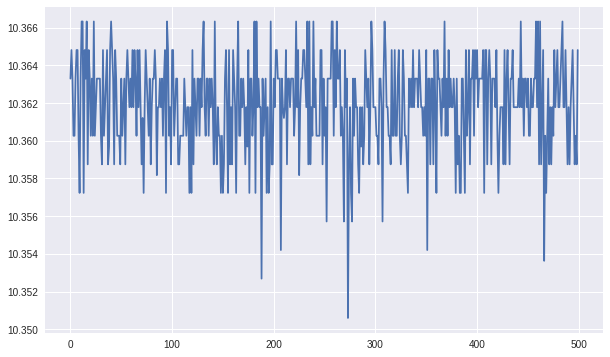

In [20]:


entropy_Y = entropy_s(Y_train)
#A lot of time to computate this 
# try to estimate if you have a lot of time:
#entropies_XY = [entropy(X_train[indx], Y_train) for indx in X_train]
entropies_XY =  [10.36329191121529, 10.364807062730442, 10.36329191121529, 10.360261608184988, 10.360261608184985, 10.363291911215288, 10.36480706273044, 10.36480706273044, 10.360261608184986, 10.35723130515468, 10.36329191121529, 10.366322214245592, 10.366322214245592, 10.357231305154682, 10.36480706273044, 10.363291911215288, 10.366322214245592, 10.35874645666984, 10.36480706273044, 10.363291911215288, 10.360261608184986, 10.363291911215288, 10.360261608184988, 10.366322214245592, 10.360261608184986, 10.36177675970014, 10.363291911215288, 10.363291911215288, 10.36329191121529, 10.363291911215288, 10.36026160818499, 10.358746456669833, 10.36480706273044, 10.36026160818499, 10.361776759700136, 10.363291911215288, 10.36480706273044, 10.358746456669836, 10.359689723713652, 10.36480706273044, 10.366322214245592, 10.36480706273044, 10.363291911215288, 10.358746456669836, 10.36480706273044, 10.363291911215288, 10.360261608184988, 10.360261608184988, 10.360261608184986, 10.358746456669836, 10.363291911215288, 10.360261608184985, 10.361776759700136, 10.36329191121529, 10.358746456669834, 10.363291911215288, 10.364807062730442, 10.363291911215288, 10.361776759700138, 10.36329191121529, 10.361776759700138, 10.364807062730442, 10.361776759700136, 10.36480706273044, 10.36329191121529, 10.360261608184986, 10.364807062730442, 10.361776759700138, 10.36480706273044, 10.36177675970014, 10.358746456669836, 10.361204875228802, 10.357231305154682, 10.361776759700138, 10.36480706273044, 10.363291911215288, 10.361776759700136, 10.360261608184985, 10.36329191121529, 10.358746456669838, 10.361776759700136, 10.36329191121529, 10.363291911215288, 10.364807062730442, 10.36329191121529, 10.358174572198498, 10.361776759700138, 10.361776759700138, 10.36329191121529, 10.36177675970014, 10.363291911215288, 10.360261608184986, 10.36329191121529, 10.364807062730442, 10.357231305154684, 10.366322214245592, 10.36480706273044, 10.360261608184988, 10.361776759700136, 10.358746456669834, 10.36480706273044, 10.364807062730442, 10.360261608184985, 10.361776759700138, 10.363291911215288, 10.363291911215288, 10.358746456669836, 10.358746456669838, 10.360261608184986, 10.360261608184985, 10.360261608184986, 10.360261608184988, 10.36329191121529, 10.361776759700138, 10.360261608184986, 10.361776759700136, 10.361776759700138, 10.357231305154682, 10.361776759700136, 10.357231305154684, 10.36480706273044, 10.358746456669833, 10.363291911215288, 10.361776759700136, 10.360261608184988, 10.363291911215288, 10.36329191121529, 10.360261608184986, 10.363291911215288, 10.361776759700138, 10.36480706273044, 10.366322214245592, 10.361776759700136, 10.360261608184985, 10.36329191121529, 10.363291911215288, 10.360261608184986, 10.363291911215288, 10.361776759700138, 10.363291911215288, 10.361776759700136, 10.358746456669836, 10.366322214245592, 10.360261608184986, 10.358746456669838, 10.361776759700136, 10.36026160818499, 10.360261608184986, 10.357231305154686, 10.360261608184988, 10.357231305154684, 10.358746456669834, 10.36329191121529, 10.36480706273044, 10.361776759700138, 10.357231305154684, 10.36480706273044, 10.358746456669834, 10.36177675970014, 10.358746456669833, 10.36480706273044, 10.36329191121529, 10.361776759700138, 10.357231305154682, 10.36329191121529, 10.366322214245592, 10.360261608184986, 10.360261608184986, 10.363291911215288, 10.361776759700136, 10.363291911215288, 10.361776759700138, 10.358746456669836, 10.361776759700136, 10.359689723713654, 10.364807062730442, 10.357231305154686, 10.36329191121529, 10.363291911215288, 10.360261608184985, 10.361776759700136, 10.366322214245592, 10.357231305154686, 10.366322214245592, 10.36177675970014, 10.36329191121529, 10.361776759700138, 10.361776759700138, 10.352685850609232, 10.36329191121529, 10.360261608184985, 10.361776759700138, 10.36329191121529, 10.35723130515468, 10.36177675970014, 10.357231305154684, 10.358746456669834, 10.366322214245592, 10.358746456669836, 10.358746456669833, 10.36329191121529, 10.361776759700136, 10.36480706273044, 10.36480706273044, 10.363291911215288, 10.36329191121529, 10.36329191121529, 10.35420100212438, 10.36329191121529, 10.361776759700138, 10.361204875228804, 10.361776759700136, 10.36480706273044, 10.358746456669836, 10.363291911215288, 10.36329191121529, 10.361776759700136, 10.36329191121529, 10.363291911215288, 10.36329191121529, 10.360261608184986, 10.36177675970014, 10.366322214245592, 10.36177675970014, 10.364807062730442, 10.358174572198502, 10.361776759700136, 10.363291911215288, 10.363291911215288, 10.36480706273044, 10.36480706273044, 10.363291911215288, 10.361776759700138, 10.366322214245592, 10.358746456669836, 10.366322214245592, 10.358746456669836, 10.361776759700136, 10.360261608184986, 10.366322214245592, 10.361776759700138, 10.36329191121529, 10.360261608184985, 10.360261608184988, 10.360261608184985, 10.360261608184985, 10.36480706273044, 10.364807062730442, 10.358746456669836, 10.363291911215288, 10.360261608184986, 10.361776759700136, 10.355716153639532, 10.363291911215288, 10.363291911215288, 10.363291911215288, 10.363291911215288, 10.366322214245592, 10.366322214245592, 10.360261608184986, 10.36480706273044, 10.361776759700138, 10.366322214245592, 10.363291911215288, 10.363291911215288, 10.36480706273044, 10.360261608184986, 10.361776759700138, 10.360261608184986, 10.35571615363953, 10.364807062730442, 10.361776759700138, 10.363291911215288, 10.35059881462274, 10.358746456669834, 10.361776759700138, 10.357231305154684, 10.355716153639532, 10.363291911215288, 10.360261608184988, 10.36329191121529, 10.361776759700136, 10.361776759700138, 10.358746456669838, 10.357231305154684, 10.361776759700138, 10.35968972371365, 10.361776759700136, 10.358746456669833, 10.360261608184986, 10.364807062730442, 10.363291911215288, 10.361776759700138, 10.363291911215288, 10.358746456669838, 10.361776759700136, 10.366322214245592, 10.36480706273044, 10.361776759700138, 10.361776759700136, 10.361776759700136, 10.36026160818499, 10.360261608184985, 10.35874645666984, 10.363291911215288, 10.363291911215288, 10.36177675970014, 10.355716153639532, 10.36329191121529, 10.366322214245592, 10.36480706273044, 10.361776759700138, 10.361776759700138, 10.360261608184986, 10.360261608184988, 10.358746456669834, 10.36480706273044, 10.360261608184986, 10.360261608184988, 10.36480706273044, 10.360261608184988, 10.360261608184985, 10.363291911215288, 10.36480706273044, 10.360261608184986, 10.358746456669834, 10.360261608184988, 10.36480706273044, 10.36329191121529, 10.360261608184986, 10.360261608184988, 10.358746456669834, 10.357231305154682, 10.363291911215288, 10.361776759700136, 10.36329191121529, 10.361776759700138, 10.36480706273044, 10.361776759700138, 10.363291911215288, 10.36329191121529, 10.363291911215288, 10.361776759700138, 10.36480706273044, 10.363291911215288, 10.361776759700136, 10.361776759700136, 10.36026160818499, 10.361776759700138, 10.360261608184986, 10.36480706273044, 10.354201002124382, 10.36329191121529, 10.363291911215288, 10.358746456669836, 10.36329191121529, 10.36329191121529, 10.358746456669834, 10.36480706273044, 10.361776759700138, 10.357231305154684, 10.36480706273044, 10.36329191121529, 10.36329191121529, 10.36177675970014, 10.360261608184986, 10.36329191121529, 10.361776759700138, 10.366322214245592, 10.360261608184985, 10.36329191121529, 10.360261608184986, 10.36480706273044, 10.361776759700138, 10.363291911215288, 10.361776759700136, 10.361776759700136, 10.363291911215288, 10.36177675970014, 10.357231305154684, 10.363291911215288, 10.358746456669834, 10.360261608184985, 10.357231305154682, 10.357231305154684, 10.363291911215288, 10.36329191121529, 10.360261608184985, 10.357231305154682, 10.36480706273044, 10.360261608184986, 10.361776759700138, 10.364807062730442, 10.358746456669836, 10.363291911215288, 10.363291911215288, 10.364807062730442, 10.36026160818499, 10.36480706273044, 10.363291911215288, 10.36480706273044, 10.361776759700136, 10.36329191121529, 10.363291911215288, 10.363291911215288, 10.363291911215288, 10.36480706273044, 10.357231305154684, 10.364807062730442, 10.36480706273044, 10.358746456669838, 10.363291911215288, 10.364807062730442, 10.363291911215288, 10.358746456669834, 10.36329191121529, 10.363291911215292, 10.36329191121529, 10.361776759700138, 10.36480706273044, 10.36026160818499, 10.357231305154682, 10.360261608184988, 10.361776759700138, 10.361776759700136, 10.36177675970014, 10.358746456669834, 10.36480706273044, 10.358746456669836, 10.363291911215288, 10.36480706273044, 10.361776759700138, 10.358746456669834, 10.363291911215288, 10.36329191121529, 10.36480706273044, 10.361776759700138, 10.36177675970014, 10.361776759700136, 10.361776759700136, 10.36177675970014, 10.363291911215288, 10.361776759700138, 10.366322214245592, 10.361776759700138, 10.363291911215288, 10.360261608184988, 10.363291911215288, 10.36329191121529, 10.361776759700138, 10.363291911215288, 10.360261608184986, 10.360261608184988, 10.36329191121529, 10.36177675970014, 10.361776759700138, 10.363291911215288, 10.363291911215288, 10.366322214245592, 10.361776759700136, 10.366322214245592, 10.358746456669836, 10.366322214245592, 10.358746456669834, 10.361776759700138, 10.36480706273044, 10.353629117653048, 10.360261608184988, 10.357231305154682, 10.360261608184986, 10.363291911215288, 10.358746456669836, 10.361776759700136, 10.358746456669834, 10.361776759700136, 10.360261608184986, 10.36480706273044, 10.361776759700136, 10.363291911215288, 10.36480706273044, 10.36177675970014, 10.361776759700136, 10.363291911215288, 10.36480706273044, 10.366322214245592, 10.361776759700136, 10.361776759700138, 10.36480706273044, 10.361776759700138, 10.358746456669836, 10.361776759700138, 10.358746456669836, 10.361776759700138, 10.363291911215288, 10.36480706273044, 10.361776759700136, 10.358746456669834, 10.360261608184985, 10.358746456669836, 10.364807062730442]

plt.figure(figsize=(10,6))
plt.plot(entropies_XY, '-')

Let estimate $H(X|Y)$

0.9992695868811567


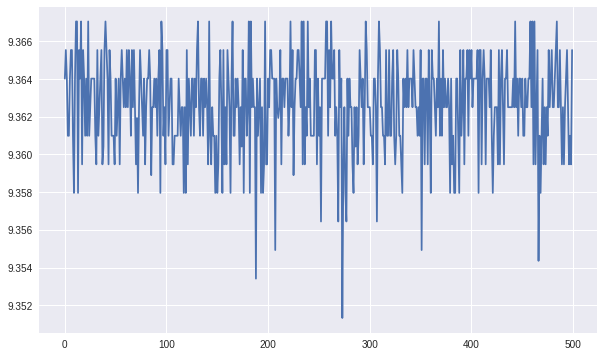

In [21]:
entropy_mutural_XY = np.array(entropies_XY) - entropy_s(Y_train)
print(entropy_s(Y_train))
plt.figure(figsize=(10,6))
plt.plot(entropy_mutural_XY, '-')

Let Estimate $H(Y|X)$ Probably, they have some depencies, however, it may be the statistical error

В случае полной зависимости систем, состояния одной системы полностью определяют состояния другой (они эквивалентны): $H(Y|X) = 0$

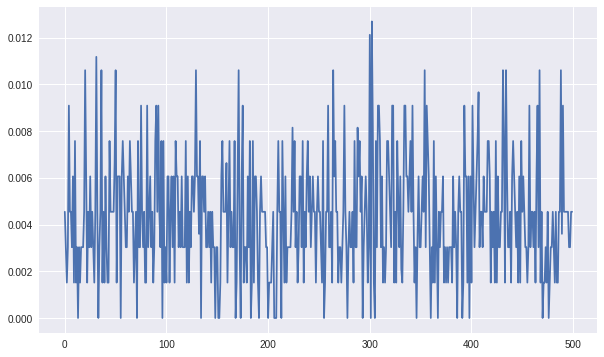

In [22]:
#entropies_X = [entropy_s(X_train[indx]) for indx in X_train ]
entropies_X = [10.358746456669838, 10.361776759700138, 10.36177675970014, 10.357231305154686, 10.351170699094077, 10.358746456669834, 10.360261608184986, 10.361776759700136, 10.35420100212438, 10.35571615363953, 10.355716153639532, 10.36480706273044, 10.36329191121529, 10.357231305154682, 10.361776759700138, 10.361776759700136, 10.363291911215288, 10.355716153639538, 10.361776759700138, 10.358746456669834, 10.34965554757893, 10.357231305154682, 10.358746456669838, 10.361776759700136, 10.357231305154682, 10.355716153639532, 10.360261608184985, 10.358746456669836, 10.360261608184986, 10.361776759700136, 10.355716153639536, 10.34756851159244, 10.360261608184985, 10.36026160818499, 10.358746456669834, 10.358746456669833, 10.35420100212438, 10.357231305154684, 10.355144269168198, 10.36329191121529, 10.360261608184985, 10.361776759700136, 10.361776759700136, 10.357231305154686, 10.357231305154682, 10.358746456669833, 10.355716153639532, 10.355716153639534, 10.355716153639534, 10.352113966137896, 10.352685850609227, 10.358746456669833, 10.355716153639532, 10.357231305154686, 10.352685850609229, 10.363291911215288, 10.358746456669836, 10.355716153639534, 10.355716153639532, 10.358746456669836, 10.358746456669834, 10.361776759700138, 10.35571615363953, 10.360261608184985, 10.355716153639538, 10.35420100212438, 10.360261608184988, 10.357231305154682, 10.363291911215288, 10.358746456669838, 10.354201002124382, 10.361204875228802, 10.349655547578928, 10.358746456669836, 10.361776759700138, 10.35420100212438, 10.35723130515468, 10.35723130515468, 10.358746456669838, 10.357231305154686, 10.360261608184985, 10.35420100212438, 10.360261608184988, 10.360261608184988, 10.357231305154684, 10.355144269168196, 10.357231305154684, 10.360261608184986, 10.360261608184986, 10.35420100212438, 10.35420100212438, 10.355716153639532, 10.354201002124382, 10.36026160818499, 10.35420100212438, 10.358746456669836, 10.36480706273044, 10.352685850609234, 10.360261608184986, 10.355716153639532, 10.36329191121529, 10.358746456669834, 10.35420100212438, 10.360261608184986, 10.358746456669834, 10.357231305154684, 10.355716153639532, 10.352685850609232, 10.358746456669834, 10.352685850609229, 10.354201002124379, 10.354201002124382, 10.360261608184986, 10.357231305154686, 10.357231305154684, 10.355716153639532, 10.358746456669834, 10.35420100212438, 10.358746456669834, 10.349655547578932, 10.363291911215288, 10.352685850609229, 10.361776759700136, 10.357231305154684, 10.357231305154684, 10.357231305154682, 10.357231305154684, 10.355716153639534, 10.357231305154684, 10.351170699094082, 10.358746456669836, 10.360261608184988, 10.3581745721985, 10.35268585060923, 10.36329191121529, 10.35723130515468, 10.35420100212438, 10.358746456669834, 10.35571615363953, 10.360261608184986, 10.358746456669836, 10.35420100212438, 10.363291911215288, 10.35571615363953, 10.357231305154688, 10.357231305154684, 10.357231305154686, 10.357231305154682, 10.357231305154686, 10.357231305154684, 10.35420100212438, 10.358746456669834, 10.36329191121529, 10.363291911215288, 10.355716153639532, 10.349655547578934, 10.360261608184985, 10.35420100212438, 10.357231305154686, 10.352113966137892, 10.363291911215288, 10.358746456669838, 10.354201002124382, 10.354201002124379, 10.358746456669836, 10.363291911215288, 10.357231305154684, 10.352685850609229, 10.363291911215288, 10.360261608184986, 10.35723130515468, 10.351170699094078, 10.355716153639532, 10.361776759700136, 10.35362911765305, 10.355716153639534, 10.355716153639536, 10.360261608184988, 10.360261608184986, 10.358746456669834, 10.35571615363953, 10.363291911215288, 10.349655547578928, 10.366322214245592, 10.360261608184988, 10.35571615363953, 10.360261608184988, 10.355716153639534, 10.346625244548626, 10.358746456669834, 10.358746456669833, 10.361776759700138, 10.358746456669834, 10.351170699094077, 10.357231305154686, 10.35268585060923, 10.35420100212438, 10.361776759700138, 10.355716153639534, 10.35571615363953, 10.36329191121529, 10.360261608184985, 10.363291911215288, 10.36329191121529, 10.360261608184986, 10.358746456669834, 10.36329191121529, 10.35420100212438, 10.36329191121529, 10.357231305154684, 10.353629117653044, 10.357231305154682, 10.360261608184986, 10.358746456669836, 10.355716153639532, 10.35874645666984, 10.360261608184986, 10.357231305154682, 10.361776759700138, 10.360261608184988, 10.357231305154686, 10.358746456669836, 10.363291911215288, 10.357231305154686, 10.35665942068335, 10.353629117653046, 10.354201002124379, 10.360261608184985, 10.358746456669836, 10.36329191121529, 10.361776759700138, 10.35723130515468, 10.355716153639534, 10.363291911215288, 10.351170699094078, 10.36480706273044, 10.354201002124382, 10.358746456669833, 10.354201002124382, 10.358746456669834, 10.357231305154686, 10.357231305154686, 10.357231305154682, 10.355716153639534, 10.354201002124379, 10.35571615363953, 10.360261608184985, 10.36329191121529, 10.35420100212438, 10.357231305154682, 10.355716153639534, 10.357231305154682, 10.35268585060923, 10.361776759700138, 10.355716153639534, 10.363291911215288, 10.361776759700136, 10.361776759700138, 10.361776759700136, 10.35117069909408, 10.361776759700136, 10.358746456669836, 10.361776759700138, 10.361776759700136, 10.352685850609229, 10.358746456669836, 10.352685850609227, 10.357231305154686, 10.355716153639534, 10.35420100212438, 10.36177675970014, 10.358746456669834, 10.361776759700136, 10.347568511592439, 10.354201002124382, 10.35268585060923, 10.35268585060923, 10.352685850609232, 10.363291911215288, 10.357231305154686, 10.358746456669834, 10.358746456669834, 10.358746456669836, 10.354201002124382, 10.355716153639532, 10.354201002124382, 10.356659420683346, 10.358746456669834, 10.35059881462274, 10.35420100212438, 10.357231305154684, 10.358746456669834, 10.355716153639534, 10.363291911215288, 10.355716153639538, 10.357231305154682, 10.360261608184986, 10.360261608184985, 10.360261608184988, 10.358746456669833, 10.349655547578928, 10.36026160818499, 10.347568511592439, 10.350598814622746, 10.361776759700138, 10.363291911215288, 10.35420100212438, 10.352685850609229, 10.35420100212438, 10.35723130515468, 10.357231305154682, 10.358746456669834, 10.355716153639536, 10.358746456669834, 10.357231305154684, 10.357231305154682, 10.361776759700138, 10.352685850609229, 10.352685850609232, 10.358746456669834, 10.355716153639534, 10.357231305154682, 10.354201002124382, 10.35571615363953, 10.358746456669836, 10.35420100212438, 10.358746456669838, 10.357231305154684, 10.3581745721985, 10.357231305154682, 10.354201002124384, 10.356659420683348, 10.355716153639532, 10.358746456669834, 10.352685850609229, 10.354201002124384, 10.355716153639532, 10.358746456669834, 10.357231305154684, 10.357231305154684, 10.355716153639534, 10.358746456669836, 10.352685850609232, 10.360261608184985, 10.361776759700136, 10.358746456669833, 10.361776759700136, 10.356659420683352, 10.355716153639534, 10.357231305154684, 10.361776759700138, 10.34965554757893, 10.357231305154686, 10.358746456669833, 10.348140396063776, 10.360261608184986, 10.354201002124386, 10.351170699094077, 10.358746456669836, 10.358746456669836, 10.357231305154684, 10.361776759700138, 10.361776759700138, 10.355716153639536, 10.360261608184988, 10.354201002124384, 10.360261608184988, 10.361776759700138, 10.361776759700138, 10.357231305154684, 10.358746456669836, 10.355716153639532, 10.358746456669833, 10.360261608184988, 10.360261608184986, 10.360261608184985, 10.358746456669833, 10.361776759700136, 10.358746456669836, 10.35420100212438, 10.360261608184986, 10.357231305154682, 10.35420100212438, 10.35420100212438, 10.35268585060923, 10.360261608184986, 10.36329191121529, 10.355716153639532, 10.35117069909408, 10.360261608184988, 10.355716153639534, 10.361776759700138, 10.363291911215292, 10.349655547578932, 10.357231305154682, 10.357231305154684, 10.363291911215292, 10.354201002124384, 10.36480706273044, 10.357231305154682, 10.36329191121529, 10.352685850609229, 10.357231305154686, 10.360261608184986, 10.358746456669834, 10.357231305154682, 10.357231305154682, 10.347568511592442, 10.36177675970014, 10.360261608184986, 10.354201002124384, 10.360261608184988, 10.358746456669834, 10.358746456669834, 10.35420100212438, 10.358746456669838, 10.355716153639536, 10.355716153639532, 10.355716153639532, 10.363291911215288, 10.355716153639536, 10.354201002124379, 10.355716153639532, 10.360261608184988, 10.354201002124379, 10.360261608184988, 10.35268585060923, 10.36177675970014, 10.355716153639532, 10.358746456669834, 10.360261608184985, 10.351170699094078, 10.351170699094078, 10.361776759700138, 10.35268585060923, 10.358746456669838, 10.358746456669834, 10.358746456669836, 10.357231305154682, 10.360261608184985, 10.355716153639534, 10.35571615363953, 10.355716153639534, 10.361776759700138, 10.358746456669836, 10.358746456669834, 10.358746456669836, 10.357231305154684, 10.361776759700138, 10.35420100212438, 10.358746456669834, 10.35420100212438, 10.355716153639532, 10.360261608184988, 10.358746456669836, 10.360261608184988, 10.360261608184988, 10.354201002124379, 10.36329191121529, 10.357231305154684, 10.361776759700138, 10.355716153639532, 10.361776759700138, 10.357231305154682, 10.355716153639534, 10.35571615363953, 10.350598814622746, 10.349655547578928, 10.35571615363953, 10.355716153639534, 10.363291911215288, 10.357231305154686, 10.360261608184986, 10.355716153639532, 10.360261608184985, 10.355716153639536, 10.36480706273044, 10.360261608184985, 10.360261608184986, 10.361776759700138, 10.357231305154684, 10.358746456669833, 10.361776759700136, 10.360261608184988, 10.36480706273044, 10.360261608184985, 10.357231305154684, 10.360261608184985, 10.351170699094082, 10.355144269168198, 10.35268585060923, 10.354201002124382, 10.357231305154688, 10.358746456669838, 10.360261608184986, 10.35723130515468, 10.355716153639532, 10.357231305154682, 10.354201002124382, 10.360261608184988]
plt.figure(figsize=(10,6))
entropies_mutural_YX = np.array(entropies_XY) - np.array(entropies_X)
plt.plot(entropies_mutural_YX, '-')

$H(X)$

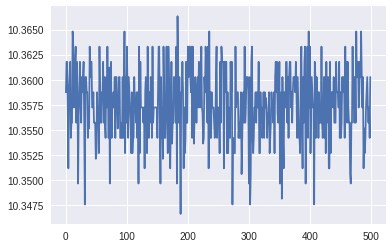

In [23]:
plt.plot(entropies_X, '-')

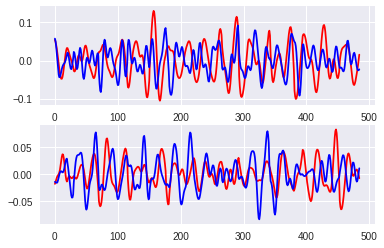

9.810680322701146e-05
0.00016556027062101099
()
-0.0004448030673598375
-0.000512874673778101
()


In [24]:
index_entropy_x = [indx for indx in range(entropies_X.__len__()) if entropies_X[indx] > 10.35]
data_indx_new = ["Time-{}".format(indx) for indx in index_entropy_x]

fig = plt.figure()
ax = fig.add_subplot(211)

ax.plot(np.mean(class1_train[data_indx_new]).as_matrix(), "r-")
ax.plot(np.mean(class2_train[data_indx_new]).as_matrix(), "b-")

ax = fig.add_subplot(212)
ax.plot(np.mean(class1_test[data_indx_new]).as_matrix(), "r-")
ax.plot(np.mean(class2_test[data_indx_new]).as_matrix(), "b-")
plt.show()
print(np.mean(np.mean(class1_test[data_indx_new])))
print(np.mean(np.mean(class2_test[data_indx_new])))
print()

print(np.mean(np.mean(class1_train[data_indx_new])))
print(np.mean(np.mean(class2_train[data_indx_new])))
print()


Split by $H(x)$ showed nothing 

let $I(Y, X)$

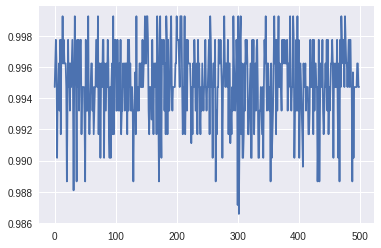

In [25]:
mutural_information_XY = np.array(entropy_s(Y_train)) - np.array(entropies_mutural_YX)
plt.plot(mutural_information_XY, '-')

$ I(X, Y) > 0$, so $X$ and $Y$ are not independed.

Let see depencies in columns which divided by $I(X, Y)$

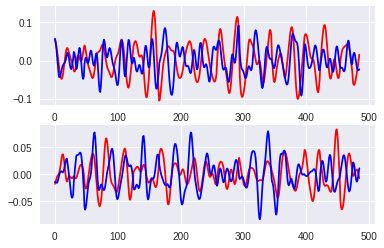

-0.000258554888884481
0.00017745317020104523
()
0.00013711687126527
-0.0002296984762429421
()


In [26]:
data_indx_new = ["Time-{}".format(indx) for indx in range(mutural_information_XY.__len__()) if mutural_information_XY[indx] > 0.99]
fig = plt.figure()
ax = fig.add_subplot(211)

ax.plot(np.mean(class1_train[data_indx_new]).as_matrix(), "r-")
ax.plot(np.mean(class2_train[data_indx_new]).as_matrix(), "b-")

ax = fig.add_subplot(212)
ax.plot(np.mean(class1_test[data_indx_new]).as_matrix(), "r-")
ax.plot(np.mean(class2_test[data_indx_new]).as_matrix(), "b-")
plt.show()
print(np.mean(np.mean(class1_test[data_indx_new])))
print(np.mean(np.mean(class2_test[data_indx_new])))
print()

print(np.mean(np.mean(class1_train[data_indx_new])))
print(np.mean(np.mean(class2_train[data_indx_new])))
print()

Let choose all indexes with $H(Y|X) = 0$ and $H(Y|X) > 0.008$



In [0]:
index_with_zero_entropy = [indx for indx in range(entropies_mutural_YX.__len__()) if entropies_mutural_YX[indx] == 0]
index_with_nonzero_entropy = [indx for indx in range(entropies_mutural_YX.__len__()) if entropies_mutural_YX[indx] > 0.008]

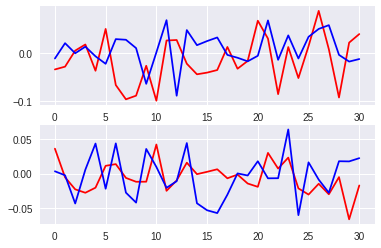

-0.00578234303111663
-0.003955468760545911
1.4515051623198439e-08
()
-0.015985231727497603
0.007466698542466015
4.7796674813554986e-08
()


In [28]:

data_indx_new = ["Time-{}".format(indx) for indx in index_with_zero_entropy]
fig = plt.figure()
ax = fig.add_subplot(211)

ax.plot(np.mean(class1_train[data_indx_new]).as_matrix(), "r-")
ax.plot(np.mean(class2_train[data_indx_new]).as_matrix(), "b-")

ax = fig.add_subplot(212)
ax.plot(np.mean(class1_test[data_indx_new]).as_matrix(), "r-")
ax.plot(np.mean(class2_test[data_indx_new]).as_matrix(), "b-")
plt.show()
print(np.mean(np.mean(class1_test[data_indx_new])))
print(np.mean(np.mean(class2_test[data_indx_new])))
print(np.mean(np.mean(X_test)))
print()

print(np.mean(np.mean(class1_train[data_indx_new])))
print(np.mean(np.mean(class2_train[data_indx_new])))
print(np.mean(np.mean(X_train)))
print()

A lot of combinations do not show something interesting

In [0]:
data_indx_new = ["Time-{}".format(indx) for indx in index_with_zero_entropy]
data_indx_new_nonzero = ["Time-{}".format(indx) for indx in index_with_nonzero_entropy]
data_indx_new.append("Target")
data_indx_new_nonzero.append("Target")
data_test_new = data_train[data_indx_new]
data_train_new = data_train[data_indx_new]



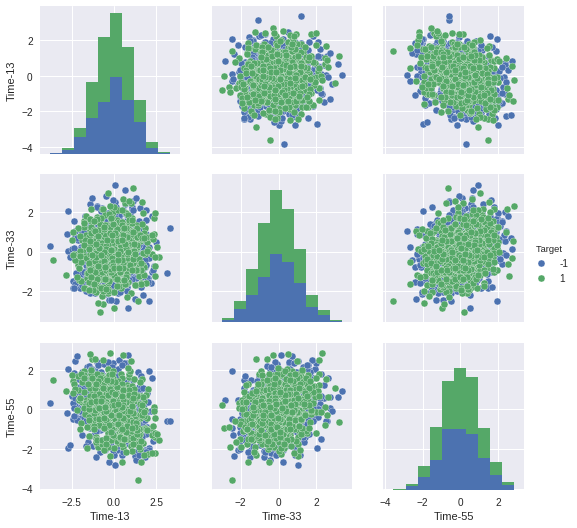

In [30]:
sns.pairplot(data_train, hue='Target', vars=data_indx_new[:3])

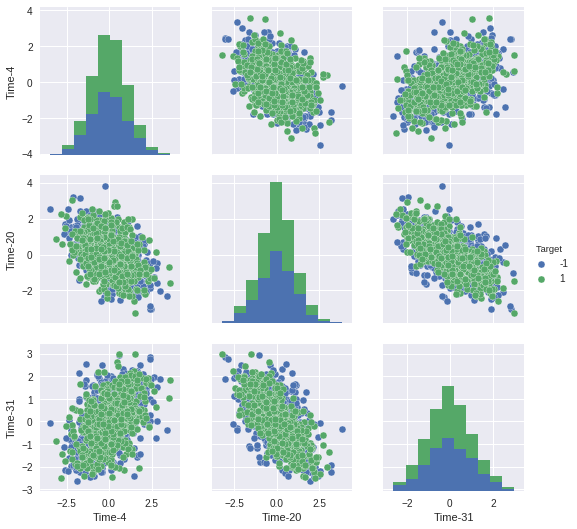

In [31]:
sns.pairplot(data_train, hue='Target', vars=data_indx_new_nonzero[:3])

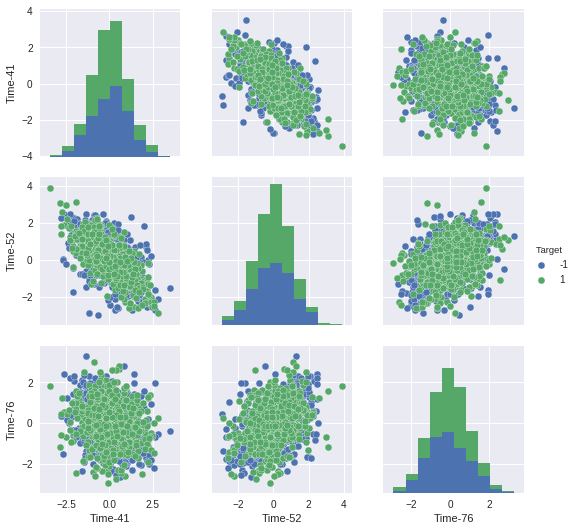

In [32]:
sns.pairplot(data_train, hue='Target', vars=["Time-41", "Time-52", "Time-76"])

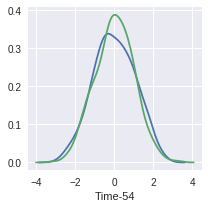

In [33]:
fg = sns.FacetGrid(data_train, hue="Target")
fg.map(sns.kdeplot, "Time-54")

Let show when $ I(Y,X) > 0.998 $

['Time-20', 'Time-31', 'Time-36', 'Time-50', 'Time-129', 'Time-171', 'Time-264', 'Time-300', 'Time-302', 'Time-354', 'Time-407', 'Time-431', 'Time-434', 'Time-467', 'Time-488']


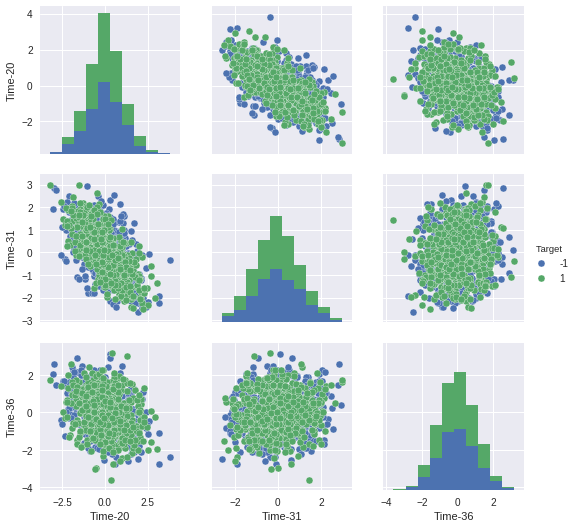

In [34]:
index_with_high_mutural_information = [indx for indx in range(mutural_information_XY.__len__()) if mutural_information_XY[indx] < 0.99]
data_indx_new_mutInfo = ["Time-{}".format(indx) for indx in index_with_high_mutural_information]
print(data_indx_new_mutInfo)

X_train_new = X_train[data_indx_new_mutInfo]

X_test_new = X_test[data_indx_new_mutInfo]

sns.pairplot(data_train, hue='Target', vars=data_indx_new_mutInfo[:3])



It was my last trying. The idea was that we should not drop indexes. Let estimate entropy of rows in 2 different classes

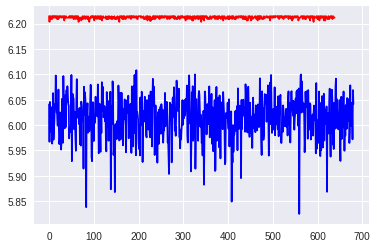

In [74]:
c1 = class1_train.T
c2 = class2_train.T
entropy_c1 = [entropy_s(c1[indx]) for indx in c1 ]
entropy_c2 = [entropy_s(c2[indx]) for indx in c2 ]


plt.figure()
plt.plot(entropy_c1, "r-")
plt.plot(entropy_c2, "b-")


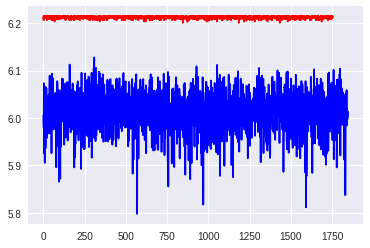

In [75]:

import scipy as sc
c1 = class1_test.T
c2 = class2_test.T
entropy_c1 = [entropy_s(c1[indx]) for indx in c1 ]
entropy_c2 = [entropy_s(c2[indx]) for indx in c2 ]

plt.figure()
plt.plot(entropy_c1, "r-")
plt.plot(entropy_c2, "b-")

In [104]:
c1[1].shape

(500,)

Without a doubt, we can obtain a simple classificator. You should estimate $H(x_i)$ of rows. if $H(x_i) > 6.15$ than $y_i = 1$, $y_i = -1$ owerside  

In [ ]:
class SimpleClassifier2:
  borfer = 6.15
  def predict(self, X):
    result = []
    for x_i in X:
      h_x = entropy_s(x_i)
      if h_x < self.borfer:
        result.append(-1)
      else:
        result.append(1)
    #print(result[:5])
    return result
    
mdl = SimpleClassifier2()
evaluate_model(mdl, X_train, Y_train, X_test, Y_test)
    
    

/home/rost/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


As you can see, accurancy is 100 % on the test and train datas

# Conclusions

In this work we have tried to reduce the colomn of data set and used correlation function to estimate some equal column. As the result, we got 1 data set and we decided to check our gain. The default classificator show that we do not have any profit and show accurancy 50% on test data. So we decided that a default algorithm is not better than throw a coin. At the end we check the last column of set and saw that distribution of 2 classes are comparable. So I decided that this data of train is generated randomly and it is no chance to train any classificator.

In the second part of work we have tyed to estimate Entropy and mutural information. Droping columns does not work, so we decided to estimate an entropy the first class and the second class. As the result, we bring algorithm of classification with 0 % error.